In [1]:
from deim_wrapper import list_models, load_model

In [2]:
list_models()

['deim_hgnetv2_n',
 'deim_hgnetv2_s',
 'deim_hgnetv2_m',
 'deim_hgnetv2_l',
 'deim_hgnetv2_x']

In [3]:
model = load_model("deim_hgnetv2_x")

2025-03-09 23:16:23.437 | INFO     | deim_wrapper.predictor:__init__:35 - Initializing Predictor with device=auto
2025-03-09 23:16:23.571 | INFO     | deim_wrapper.predictor:__init__:54 - Auto-selected device: cuda
2025-03-09 23:16:23.621 | INFO     | deim_wrapper.predictor:_download_checkpoint:149 - Downloading checkpoint for model deim_hgnetv2_x...
Downloading...
From (original): https://drive.google.com/uc?id=1dPtbgtGgq1Oa7k_LgH1GXPelg1IVeu0j
From (redirected): https://drive.google.com/uc?id=1dPtbgtGgq1Oa7k_LgH1GXPelg1IVeu0j&confirm=t&uuid=7b01e942-d7cc-4907-bb9a-05f48f18a257
To: /home/dnth/.cache/deim/checkpoints/deim_hgnetv2_x.pth
100%|██████████| 252M/252M [00:17<00:00, 14.5MB/s] 
2025-03-09 23:16:45.735 | SUCCESS  | deim_wrapper.predictor:_download_checkpoint:152 - Downloaded checkpoint to /home/dnth/.cache/deim/checkpoints/deim_hgnetv2_x.pth
2025-03-09 23:16:45.737 | DEBUG    | deim_wrapper.predictor:__init__:78 - Successfully initialized distributed environment
2025-03-09 23:1

In [4]:
image_path = '/home/dnth/Downloads/sample_images/coco/000000000785.jpg'

result = model.predict(image_path, visualize=True, save_path='out.jpg')
result

2025-03-09 23:16:46.573 | DEBUG    | deim_wrapper.predictor:predict:178 - Loading image from path: /home/dnth/Downloads/sample_images/coco/000000000785.jpg
2025-03-09 23:16:46.865 | DEBUG    | deim_wrapper.predictor:predict:212 - Prediction complete. Found 2 objects
2025-03-09 23:16:46.865 | DEBUG    | deim_wrapper.predictor:predict:215 - Generating visualization


{'boxes': array([[280.10248,  42.86722, 497.18176, 392.87958],
        [208.58356, 361.53705, 611.1134 , 399.64642]], dtype=float32),
 'labels': array([ 0, 30]),
 'scores': array([0.9322914, 0.7899572], dtype=float32),
 'visualization': <PIL.Image.Image image mode=RGB size=640x425>}

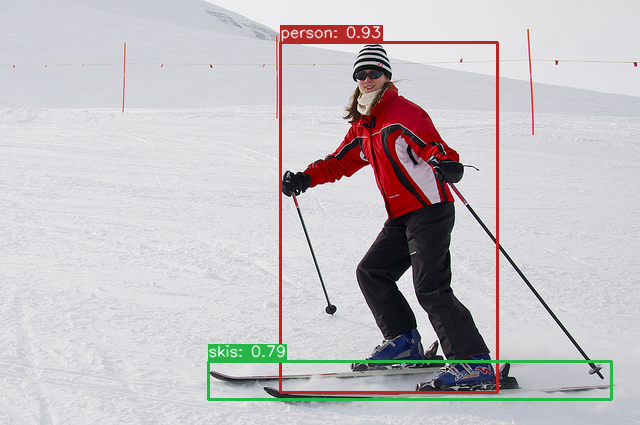

In [5]:
result["visualization"]

In [6]:
# Load folder of images
import glob
image_paths = glob.glob('/home/dnth/Downloads/sample_images/coco/*.jpg')

image_paths



['/home/dnth/Downloads/sample_images/coco/000000002587.jpg',
 '/home/dnth/Downloads/sample_images/coco/000000007088.jpg',
 '/home/dnth/Downloads/sample_images/coco/000000005193.jpg',
 '/home/dnth/Downloads/sample_images/coco/000000001761.jpg',
 '/home/dnth/Downloads/sample_images/coco/basset_hound_1.jpg',
 '/home/dnth/Downloads/sample_images/coco/Bombay_1.jpg',
 '/home/dnth/Downloads/sample_images/coco/beagle_6.jpg',
 '/home/dnth/Downloads/sample_images/coco/000000000785.jpg',
 '/home/dnth/Downloads/sample_images/coco/Abyssinian_1.jpg']

In [7]:
results = model.predict_batch(image_paths, visualize=True)

2025-03-09 23:16:46.912 | INFO     | deim_wrapper.predictor:predict_batch:249 - Processing batch of 9 images with batch_size=16
2025-03-09 23:16:46.913 | DEBUG    | deim_wrapper.predictor:predict_batch:262 - Loading image 0 from path: /home/dnth/Downloads/sample_images/coco/000000002587.jpg
2025-03-09 23:16:46.920 | DEBUG    | deim_wrapper.predictor:predict_batch:262 - Loading image 1 from path: /home/dnth/Downloads/sample_images/coco/000000007088.jpg
2025-03-09 23:16:46.929 | DEBUG    | deim_wrapper.predictor:predict_batch:262 - Loading image 2 from path: /home/dnth/Downloads/sample_images/coco/000000005193.jpg
2025-03-09 23:16:46.937 | DEBUG    | deim_wrapper.predictor:predict_batch:262 - Loading image 3 from path: /home/dnth/Downloads/sample_images/coco/000000001761.jpg
2025-03-09 23:16:46.946 | DEBUG    | deim_wrapper.predictor:predict_batch:262 - Loading image 4 from path: /home/dnth/Downloads/sample_images/coco/basset_hound_1.jpg
2025-03-09 23:16:46.953 | DEBUG    | deim_wrapper.

In [8]:
results

[{'boxes': array([[5.2582623e+01, 1.1853761e+02, 4.4915677e+02, 3.5654623e+02],
         [5.1401451e+01, 6.0593338e+00, 4.4936807e+02, 3.5681723e+02],
         [1.6880930e+02, 1.1565529e+01, 4.2262067e+02, 2.6547556e+02],
         [1.6880930e+02, 1.1565529e+01, 4.2262067e+02, 2.6547556e+02],
         [4.7971308e-01, 4.2345375e-01, 4.9977444e+02, 3.7236005e+02]],
        dtype=float32),
  'labels': array([46, 46, 46, 47, 45]),
  'scores': array([0.8519038 , 0.45435956, 0.39054227, 0.33812505, 0.30015984],
        dtype=float32),
  'visualization': <PIL.Image.Image image mode=RGB size=500x375>},
 {'boxes': array([[179.00638 , 209.76993 , 274.2057  , 463.6243  ],
         [ 85.328354, 173.61926 , 307.28915 , 264.3295  ],
         [230.88219 , 153.47507 , 370.55597 , 189.82654 ],
         [ 46.594044, 174.59885 ,  86.55558 , 193.82233 ],
         [231.0281  , 153.42645 , 370.55386 , 190.05836 ],
         [231.14847 , 153.68254 , 302.628   , 180.03387 ],
         [ 46.438297, 174.57199 ,  6

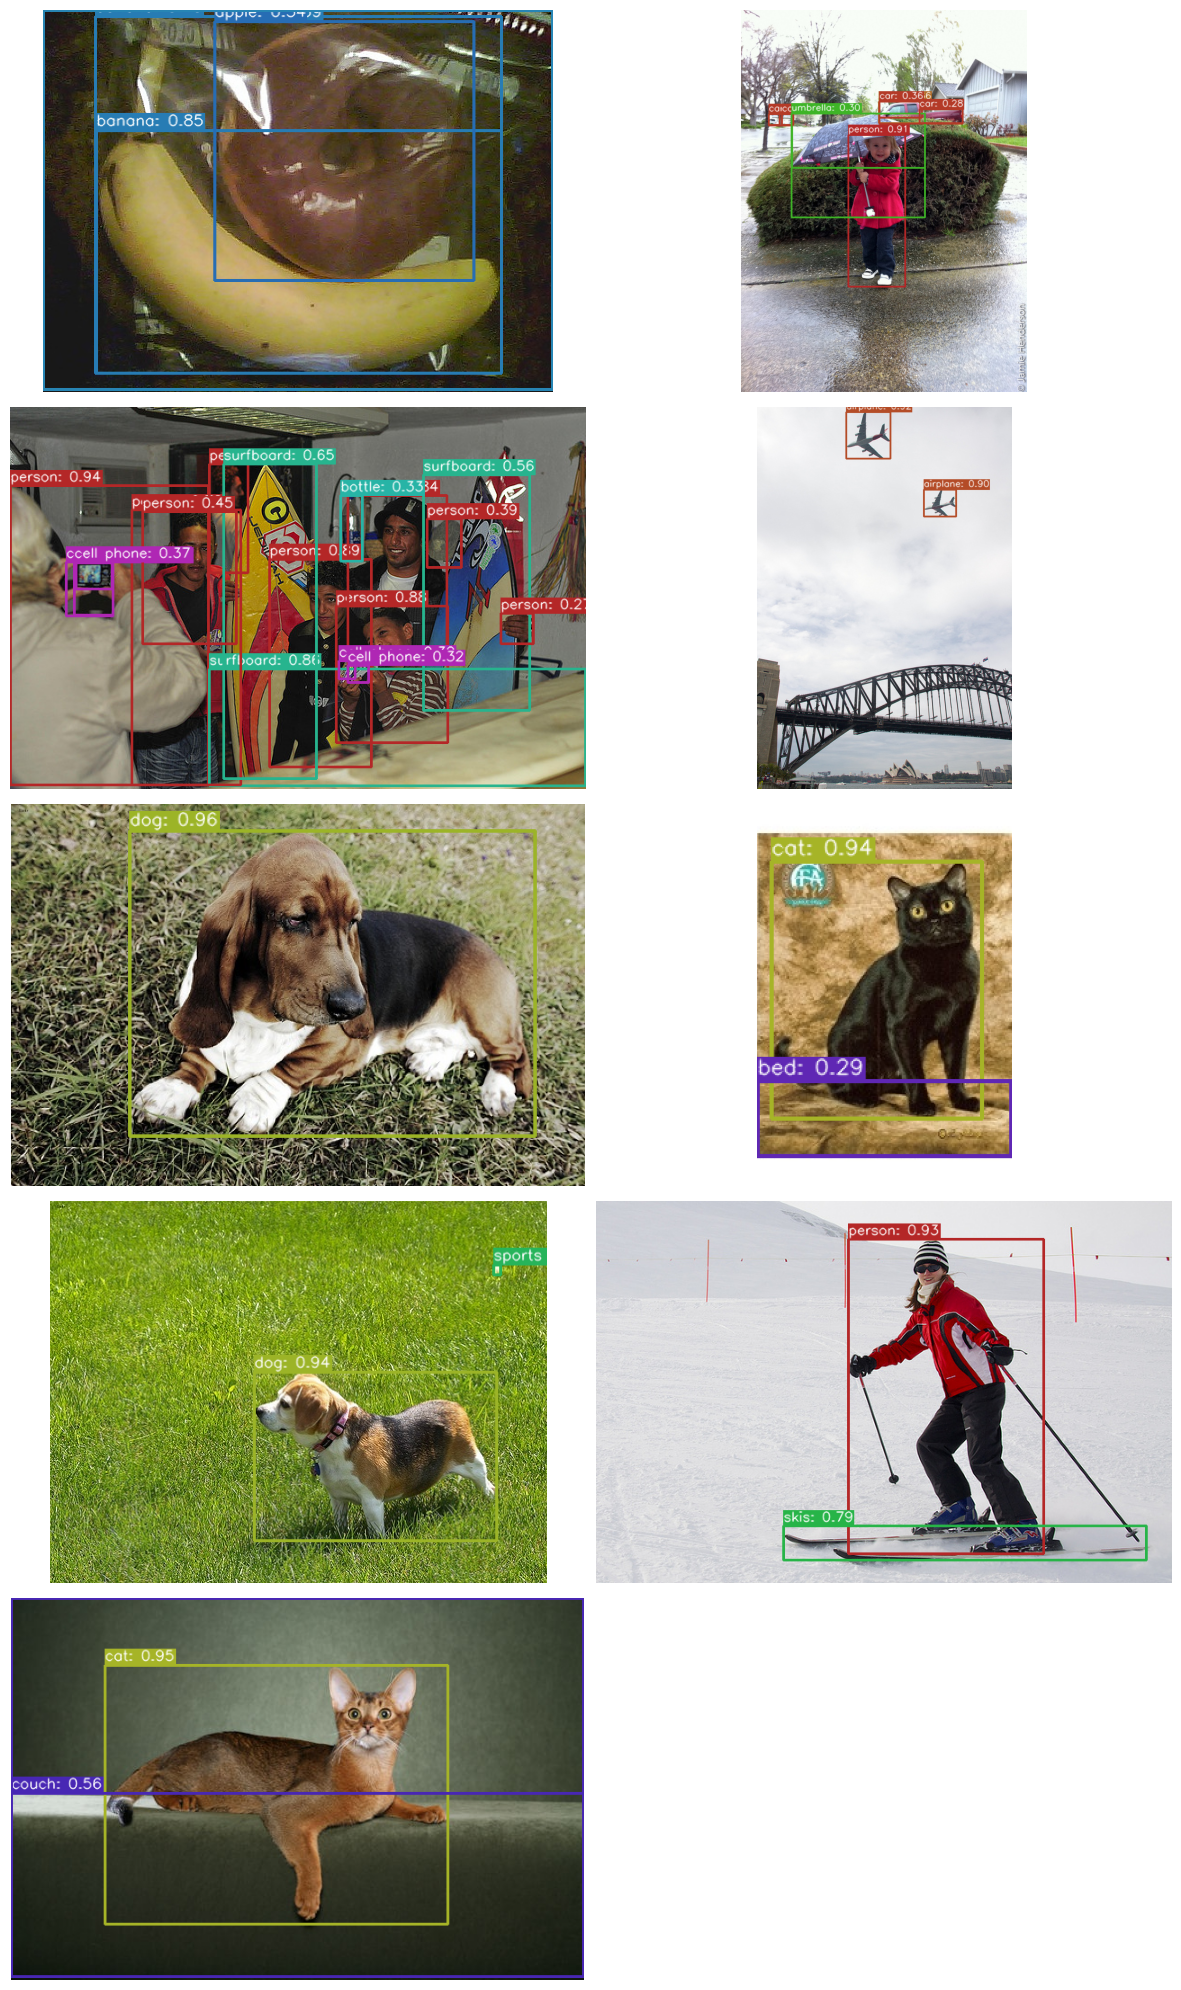

In [9]:
# Plot results in a grid
import matplotlib.pyplot as plt
import math

n_cols = 2
n_rows = math.ceil(len(results) / n_cols)
plt.figure(figsize=(12, 4*n_rows))  # Adjust figure size for better visibility

for i, result in enumerate(results):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(result["visualization"])
    plt.axis('off')
plt.tight_layout()  # Adjust spacing between subplots
plt.show()